In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("C:/Users/Asus/merged-dataset 2019-2021.xlsx")

In [3]:
df.head()

Station Code                                       Station Name  \
0          26.0  WELL AT GRAM PANCHAYAT OFFICE, KAANURU, VIJAYWADA   
1        1513.0  BOREWELL KRISHNA MURTHY, D.NO. 48-16-43 AUTONA...   
2        1514.0  BOREWELL        VIJAY        KUMAR AUTONAGAR V...   
3        1516.0                BOREWELL OF NAVLOK GARDENS, NELLORE   
4        1517.0           BOREWELL  NEAR  TUNGBHADRA RIVER KURNOOL   

       State Name  Year  Temperature ⁰C    pH  Conductivity (µmhos/cm)  \
0  ANDHRA PRADESH  2019            25.5  7.85                   1827.5   
1  ANDHRA PRADESH  2019            26.0  7.55                   1834.5   
2  ANDHRA PRADESH  2019            25.5  7.55                   1718.0   
3  ANDHRA PRADESH  2019            19.0  7.95                   1228.0   
4  ANDHRA PRADESH  2019            22.0  7.50                   5010.0   

   B.O.D.  Nitrate-N + Nitrite-N (mg/l)  Faecal Coli form (MPN/100ml)  \
0    1.10                         1.955                         219.5   
1    1.10                         2.275                         432.0   
2    2.65                         0.840                         210.5   
3    1.20                         1.580                         210.5   
4    0.80                         4.000                           2.0   

   Total Coli form (MPN/100ml)  
0                          2.5  
1                          2.5  
2                          2.5  
3                          2.5  
4                          2.0

In [4]:
df.shape

(3107, 11)

In [5]:
df.isnull().sum()

Station Code                    6
Station Name                    0
State Name                      6
Year                            0
Temperature ⁰C                  0
pH                              0
Conductivity (µmhos/cm)         0
B.O.D.                          0
Nitrate-N + Nitrite-N (mg/l)    0
Faecal Coli form (MPN/100ml)    0
Total Coli form (MPN/100ml)     0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

Station Code                    0
Station Name                    0
State Name                      0
Year                            0
Temperature ⁰C                  0
pH                              0
Conductivity (µmhos/cm)         0
B.O.D.                          0
Nitrate-N + Nitrite-N (mg/l)    0
Faecal Coli form (MPN/100ml)    0
Total Coli form (MPN/100ml)     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3101 entries, 0 to 3106
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Station Code                  3101 non-null   float64
 1   Station Name                  3101 non-null   object 
 2   State Name                    3101 non-null   object 
 3   Year                          3101 non-null   int64  
 4   Temperature ⁰C                3101 non-null   float64
 5   pH                            3101 non-null   float64
 6   Conductivity (µmhos/cm)       3101 non-null   float64
 7   B.O.D.                        3101 non-null   float64
 8   Nitrate-N + Nitrite-N (mg/l)  3101 non-null   float64
 9   Faecal Coli form (MPN/100ml)  3101 non-null   float64
 10  Total Coli form (MPN/100ml)   3101 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 290.7+ KB


In [9]:
df.shape

(3101, 11)

In [10]:
df_final = df.select_dtypes(exclude="object")

In [11]:
df.columns

Index(['Station Code', 'Station Name', 'State Name', 'Year', 'Temperature ⁰C',
       'pH', 'Conductivity (µmhos/cm)', 'B.O.D.',
       'Nitrate-N + Nitrite-N (mg/l)', 'Faecal Coli form (MPN/100ml)',
       'Total Coli form (MPN/100ml)'],
      dtype='object')

In [12]:
df_final.drop(["Station Code",'Temperature ⁰C','Year'], axis=1, inplace=True)

In [13]:
df_final.head()

pH  Conductivity (µmhos/cm)  B.O.D.  Nitrate-N + Nitrite-N (mg/l)  \
0  7.85                   1827.5    1.10                         1.955   
1  7.55                   1834.5    1.10                         2.275   
2  7.55                   1718.0    2.65                         0.840   
3  7.95                   1228.0    1.20                         1.580   
4  7.50                   5010.0    0.80                         4.000   

   Faecal Coli form (MPN/100ml)  Total Coli form (MPN/100ml)  
0                         219.5                          2.5  
1                         432.0                          2.5  
2                         210.5                          2.5  
3                         210.5                          2.5  
4                           2.0                          2.0

In [14]:
wi = np.array([0.3344, 0.0028425, 0.5685, 0.0632, 0.28425, 0.0028425])

In [15]:
si = np.array([8.5, 1000, 5, 45, 100, 1000])

In [16]:
videal = np.array([7, 0, 0, 0, 0, 0])

In [17]:
def calc_wqi(sample):
    wqi_sample = 0
    num_col = 6
    for index in range(num_col):
        v_index = sample[index]
        v_index_ideal = videal[index]
        w_index = wi[index]
        std_index = si[index]
        q_index = (v_index - v_index_ideal) / (std_index - v_index_ideal)
        q_index = q_index * 100
        wqi_sample += q_index * w_index
    return wqi_sample

In [18]:
def calc_wqi_for_df(df):
    wqi_arr = []
    for index in range(df.shape[0]):
        index_row = df.iloc[index, :]
        wqi_row = calc_wqi(index_row)
        wqi_arr.append(wqi_row)
    return wqi_arr

In [19]:
wqi_arr = calc_wqi_for_df(df_final)
# Converting oridnary array to numpy array
wqi_arr = np.array(wqi_arr)
wqi_arr = np.reshape(wqi_arr, (-1, 1))

# Resetting index values of the dataframes
wqi_arr_df = pd.DataFrame(wqi_arr, columns=["WQI"]).reset_index()
df_final = df_final.reset_index()

In [20]:
df_wqi = pd.concat([df_final, pd.DataFrame(wqi_arr, columns=["WQI"])], axis=1)
df_wqi.drop("index", axis=1, inplace=True)
df_wqi.shape

(3101, 7)

In [21]:
df_wqi[(df_wqi["WQI"] < 0)]

pH  Conductivity (µmhos/cm)  B.O.D.  Nitrate-N + Nitrite-N (mg/l)  \
60    6.00                    121.0     1.3                          1.20   
201   6.65                    613.0     0.0                          4.15   
209   6.30                    307.0     0.0                          2.89   
210   6.50                    238.0     0.0                          0.10   
211   6.50                     98.0     0.0                          0.06   
...    ...                      ...     ...                           ...   
2999  5.60                     91.5     1.0                          0.30   
3000  6.10                    111.5     1.0                          0.30   
3001  5.65                    114.0     1.0                          0.30   
3002  5.85                    104.5     1.0                          0.30   
3037  6.40                    199.5     1.0                          0.30   

      Faecal Coli form (MPN/100ml)  Total Coli form (MPN/100ml)        WQI  
60                             2.0                          2.0  -6.740337  
201                            6.0                          4.5  -5.338798  
209                            2.0                          0.0 -14.543684  
210                            8.0                          0.0  -8.790971  
211                            2.0                          0.0 -10.541883  
...                            ...                          ...        ...  
2999                           2.0                          2.0 -19.203456  
3000                           2.0                          2.0  -8.051104  
3001                           2.0                          2.0 -18.082394  
3002                           2.0                          2.0 -13.626427  
3037                           2.0                          2.0  -1.338090  

[427 rows x 7 columns]

In [22]:
df_neg_indices = df_wqi[(df_wqi["WQI"] < 0)].index
df_wqi.drop(df_neg_indices, axis=0, inplace=True)

In [23]:
df_wqi["WQI clf"] = df_wqi["WQI"].apply(lambda x: (1 if (x <= 25)  
                                        else(2 if (26<=x<=50) 
                                        else(3 if (51<=x<=75) 
                                        else(4 if (76<=x<=100) 
                                        else 5)))))

In [24]:
df_wqi.head()

pH  Conductivity (µmhos/cm)  B.O.D.  Nitrate-N + Nitrite-N (mg/l)  \
0  7.85                   1827.5    1.10                         1.955   
1  7.55                   1834.5    1.10                         2.275   
2  7.55                   1718.0    2.65                         0.840   
3  7.95                   1228.0    1.20                         1.580   
4  7.50                   5010.0    0.80                         4.000   

   Faecal Coli form (MPN/100ml)  Total Coli form (MPN/100ml)         WQI  \
0                         219.5                          2.5   94.643955   
1                         432.0                          2.5  148.406012   
2                         210.5                          2.5  102.833484   
3                         210.5                          2.5   95.228964   
4                           2.0                          2.0   22.797605   

   WQI clf  
0        4  
1        5  
2        5  
3        4  
4        1

In [25]:
df_wqi["WQI clf"].unique()

array([4, 5, 1, 3, 2], dtype=int64)

In [26]:
merged_dataset_without_temperature = 'dataset without temperature.xlsx'
df_wqi.to_excel(merged_dataset_without_temperature, index=False)

In [27]:
df_wqi["WQI clf"].value_counts()

1    1702
2     647
5     202
3      83
4      40
Name: WQI clf, dtype: int64

In [28]:
df_wqi.shape

(2674, 8)

In [29]:
df_wqi.columns

Index(['pH', 'Conductivity (µmhos/cm)', 'B.O.D.',
       'Nitrate-N + Nitrite-N (mg/l)', 'Faecal Coli form (MPN/100ml)',
       'Total Coli form (MPN/100ml)', 'WQI', 'WQI clf'],
      dtype='object')

In [30]:
X = df_wqi[['pH', 'Conductivity (µmhos/cm)', 'B.O.D.',
       'Nitrate-N + Nitrite-N (mg/l)', 'Total Coli form (MPN/100ml)',
       'Faecal Coli form (MPN/100ml)']]

In [31]:
y = df_wqi[['WQI clf']]

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Assuming you already have df_wqi loaded

# Encode the 'WQI clf' column as integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_wqi['WQI clf'])

# Convert the target variable to categorical
y = to_categorical(y, num_classes=5)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = keras.Sequential()
model.add(layers.Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')


Epoch 1/100
54/54 [==============================] - 1s 5ms/step - loss: 1.4313 - accuracy: 0.5926 - val_loss: 1.1945 - val_accuracy: 0.6262
Epoch 2/100
54/54 [==============================] - 0s 2ms/step - loss: 0.9526 - accuracy: 0.6517 - val_loss: 0.8165 - val_accuracy: 0.6495
Epoch 3/100
54/54 [==============================] - 0s 3ms/step - loss: 0.7589 - accuracy: 0.6961 - val_loss: 0.7186 - val_accuracy: 0.7126
Epoch 4/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6755 - accuracy: 0.7516 - val_loss: 0.6413 - val_accuracy: 0.7874
Epoch 5/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6151 - accuracy: 0.7896 - val_loss: 0.5869 - val_accuracy: 0.8061
Epoch 6/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5587 - accuracy: 0.8182 - val_loss: 0.5369 - val_accuracy: 0.8248
Epoch 7/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5108 - accuracy: 0.8369 - val_loss: 0.4958 - val_accuracy: 0.8481
Epoch 8/100
5

Epoch 59/100
54/54 [==============================] - 0s 2ms/step - loss: 0.1073 - accuracy: 0.9684 - val_loss: 0.1633 - val_accuracy: 0.9579
Epoch 60/100
54/54 [==============================] - 0s 2ms/step - loss: 0.1051 - accuracy: 0.9690 - val_loss: 0.1625 - val_accuracy: 0.9579
Epoch 61/100
54/54 [==============================] - 0s 2ms/step - loss: 0.1065 - accuracy: 0.9661 - val_loss: 0.1510 - val_accuracy: 0.9626
Epoch 62/100
54/54 [==============================] - 0s 2ms/step - loss: 0.1031 - accuracy: 0.9684 - val_loss: 0.1606 - val_accuracy: 0.9533
Epoch 63/100
54/54 [==============================] - 0s 2ms/step - loss: 0.1023 - accuracy: 0.9690 - val_loss: 0.1572 - val_accuracy: 0.9579
Epoch 64/100
54/54 [==============================] - 0s 2ms/step - loss: 0.1037 - accuracy: 0.9679 - val_loss: 0.1505 - val_accuracy: 0.9579
Epoch 65/100
54/54 [==============================] - 0s 2ms/step - loss: 0.1136 - accuracy: 0.9661 - val_loss: 0.1595 - val_accuracy: 0.9486
Epoch 

17/17 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

     Class 1       0.99      0.99      0.99       360
     Class 2       0.95      0.98      0.96       112
     Class 3       0.79      0.85      0.81        13
     Class 4       0.86      0.86      0.86         7
     Class 5       0.89      0.74      0.81        43

    accuracy                           0.96       535
   macro avg       0.89      0.88      0.89       535
weighted avg       0.96      0.96      0.96       535



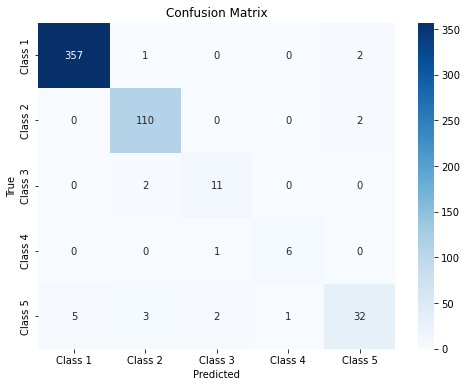

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you already have your model and data ready

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to class labels

# Convert one-hot encoded true labels to class labels
y_true_classes = np.argmax(y_test, axis=1)

# Create a classification report
class_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']
report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)

# Print the classification report
print(report)

# Create a confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [34]:
import pandas as pd
import numpy as np

# Assuming you already have df_wqi loaded

# Check unique values in the 'WQI clf' column
unique_values = df_wqi['WQI clf'].unique()
print("Unique values in 'WQI clf' column:", unique_values)

# Check for missing values
missing_values = df_wqi['WQI clf'].isnull().sum()
print("Missing values in 'WQI clf' column:", missing_values)

# Check the data type of 'WQI clf' column
print("Data type of 'WQI clf' column:", df_wqi['WQI clf'].dtype)


Unique values in 'WQI clf' column: [4 5 1 3 2]
Missing values in 'WQI clf' column: 0
Data type of 'WQI clf' column: int64
